In [1]:
#system modules
import os
import itertools
from PIL import Image

In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [3]:
#pre-processing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
#deep learning modules
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam, Adamax

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Get Paths of Training and testing directories

Training = "/content/drive/MyDrive/Dataset/Training"

# Create two lists to store paths of images and their labels

imgpaths = []
labels =[]


# Convert directories to lists

tr_dir = os.listdir(Training)

In [7]:
# Get paths and Labels of classes and images in Training Directory

for i in tr_dir:
    classpath = os.path.join(Training, i)
    imglist = os.listdir(classpath)

    for img in imglist:
        imgpath = os.path.join(classpath, img)

        imgpaths.append(imgpath)
        labels.append(i)


In [8]:
# Convert two lists of imgpaths and their labels into series

Paths = pd.Series(imgpaths, name = 'Paths')
Labels = pd.Series(labels, name = 'Labels')

# Concatenate them in one Dataframe called Tr_data

Tr_data = pd.concat([Paths, Labels], axis = 1)

In [9]:
# Get Paths of testing directory

Testing = "/content/drive/MyDrive/Dataset/Testing"

# Create two lists to store paths of images and their labels

imgpaths = []
labels =[]


# Convert directories to lists

ts_dir = os.listdir(Testing)

In [10]:
# Get paths and Labels of classes and images in Training Directory

for i in ts_dir:
    classpath = os.path.join(Testing, i)
    imglist = os.listdir(classpath)

    for img in imglist:
        imgpath = os.path.join(classpath, img)

        imgpaths.append(imgpath)
        labels.append(i)

In [11]:
# Convert two lists of imgpaths and their labels into series

Paths = pd.Series(imgpaths, name = 'Paths')
Labels = pd.Series(labels, name = 'Labels')

# Concatenate them in one Dataframe called Tr_data

Ts_data = pd.concat([Paths, Labels], axis = 1)

In [12]:
Tr_data.shape

(5742, 2)

In [13]:
Tr_data.head()

,Paths,Labels
0,/content/drive/MyDrive/Dataset/Training/mening...,meningioma
1,/content/drive/MyDrive/Dataset/Training/mening...,meningioma
2,/content/drive/MyDrive/Dataset/Training/mening...,meningioma
3,/content/drive/MyDrive/Dataset/Training/mening...,meningioma
4,/content/drive/MyDrive/Dataset/Training/mening...,meningioma


In [14]:
Ts_data.shape

(1311, 2)

In [15]:
Ts_data.head()

,Paths,Labels
0,/content/drive/MyDrive/Dataset/Testing/notumor...,notumor
1,/content/drive/MyDrive/Dataset/Testing/notumor...,notumor
2,/content/drive/MyDrive/Dataset/Testing/notumor...,notumor
3,/content/drive/MyDrive/Dataset/Testing/notumor...,notumor
4,/content/drive/MyDrive/Dataset/Testing/notumor...,notumor


In [16]:
valid_df, test_df = train_test_split(Ts_data, train_size = 0.5, shuffle = True, random_state = 123)
print(valid_df.shape)
print(test_df.shape)

(655, 2)
(656, 2)


In [17]:
# Define hyperparameters

batch_size = 20
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)


#Create generators

Tr_G = ImageDataGenerator(fill_mode='nearest')

Val_G = ImageDataGenerator()

Test_G = ImageDataGenerator()


In [18]:
Train = Tr_G.flow_from_dataframe(Tr_data, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = True, batch_size = batch_size)

Found 5742 validated image filenames belonging to 4 classes.


In [19]:
Valid = Val_G.flow_from_dataframe(valid_df, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = True, batch_size = batch_size)


Found 655 validated image filenames belonging to 4 classes.


In [20]:
Test = Test_G.flow_from_dataframe(test_df, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = False, batch_size = batch_size)


Found 656 validated image filenames belonging to 4 classes.


In [21]:
L_index = Train.class_indices
L_index

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [22]:
Keys = list(L_index.keys())
Keys

['glioma', 'meningioma', 'notumor', 'pituitary']

In [23]:
imgs, labels = next(Train)

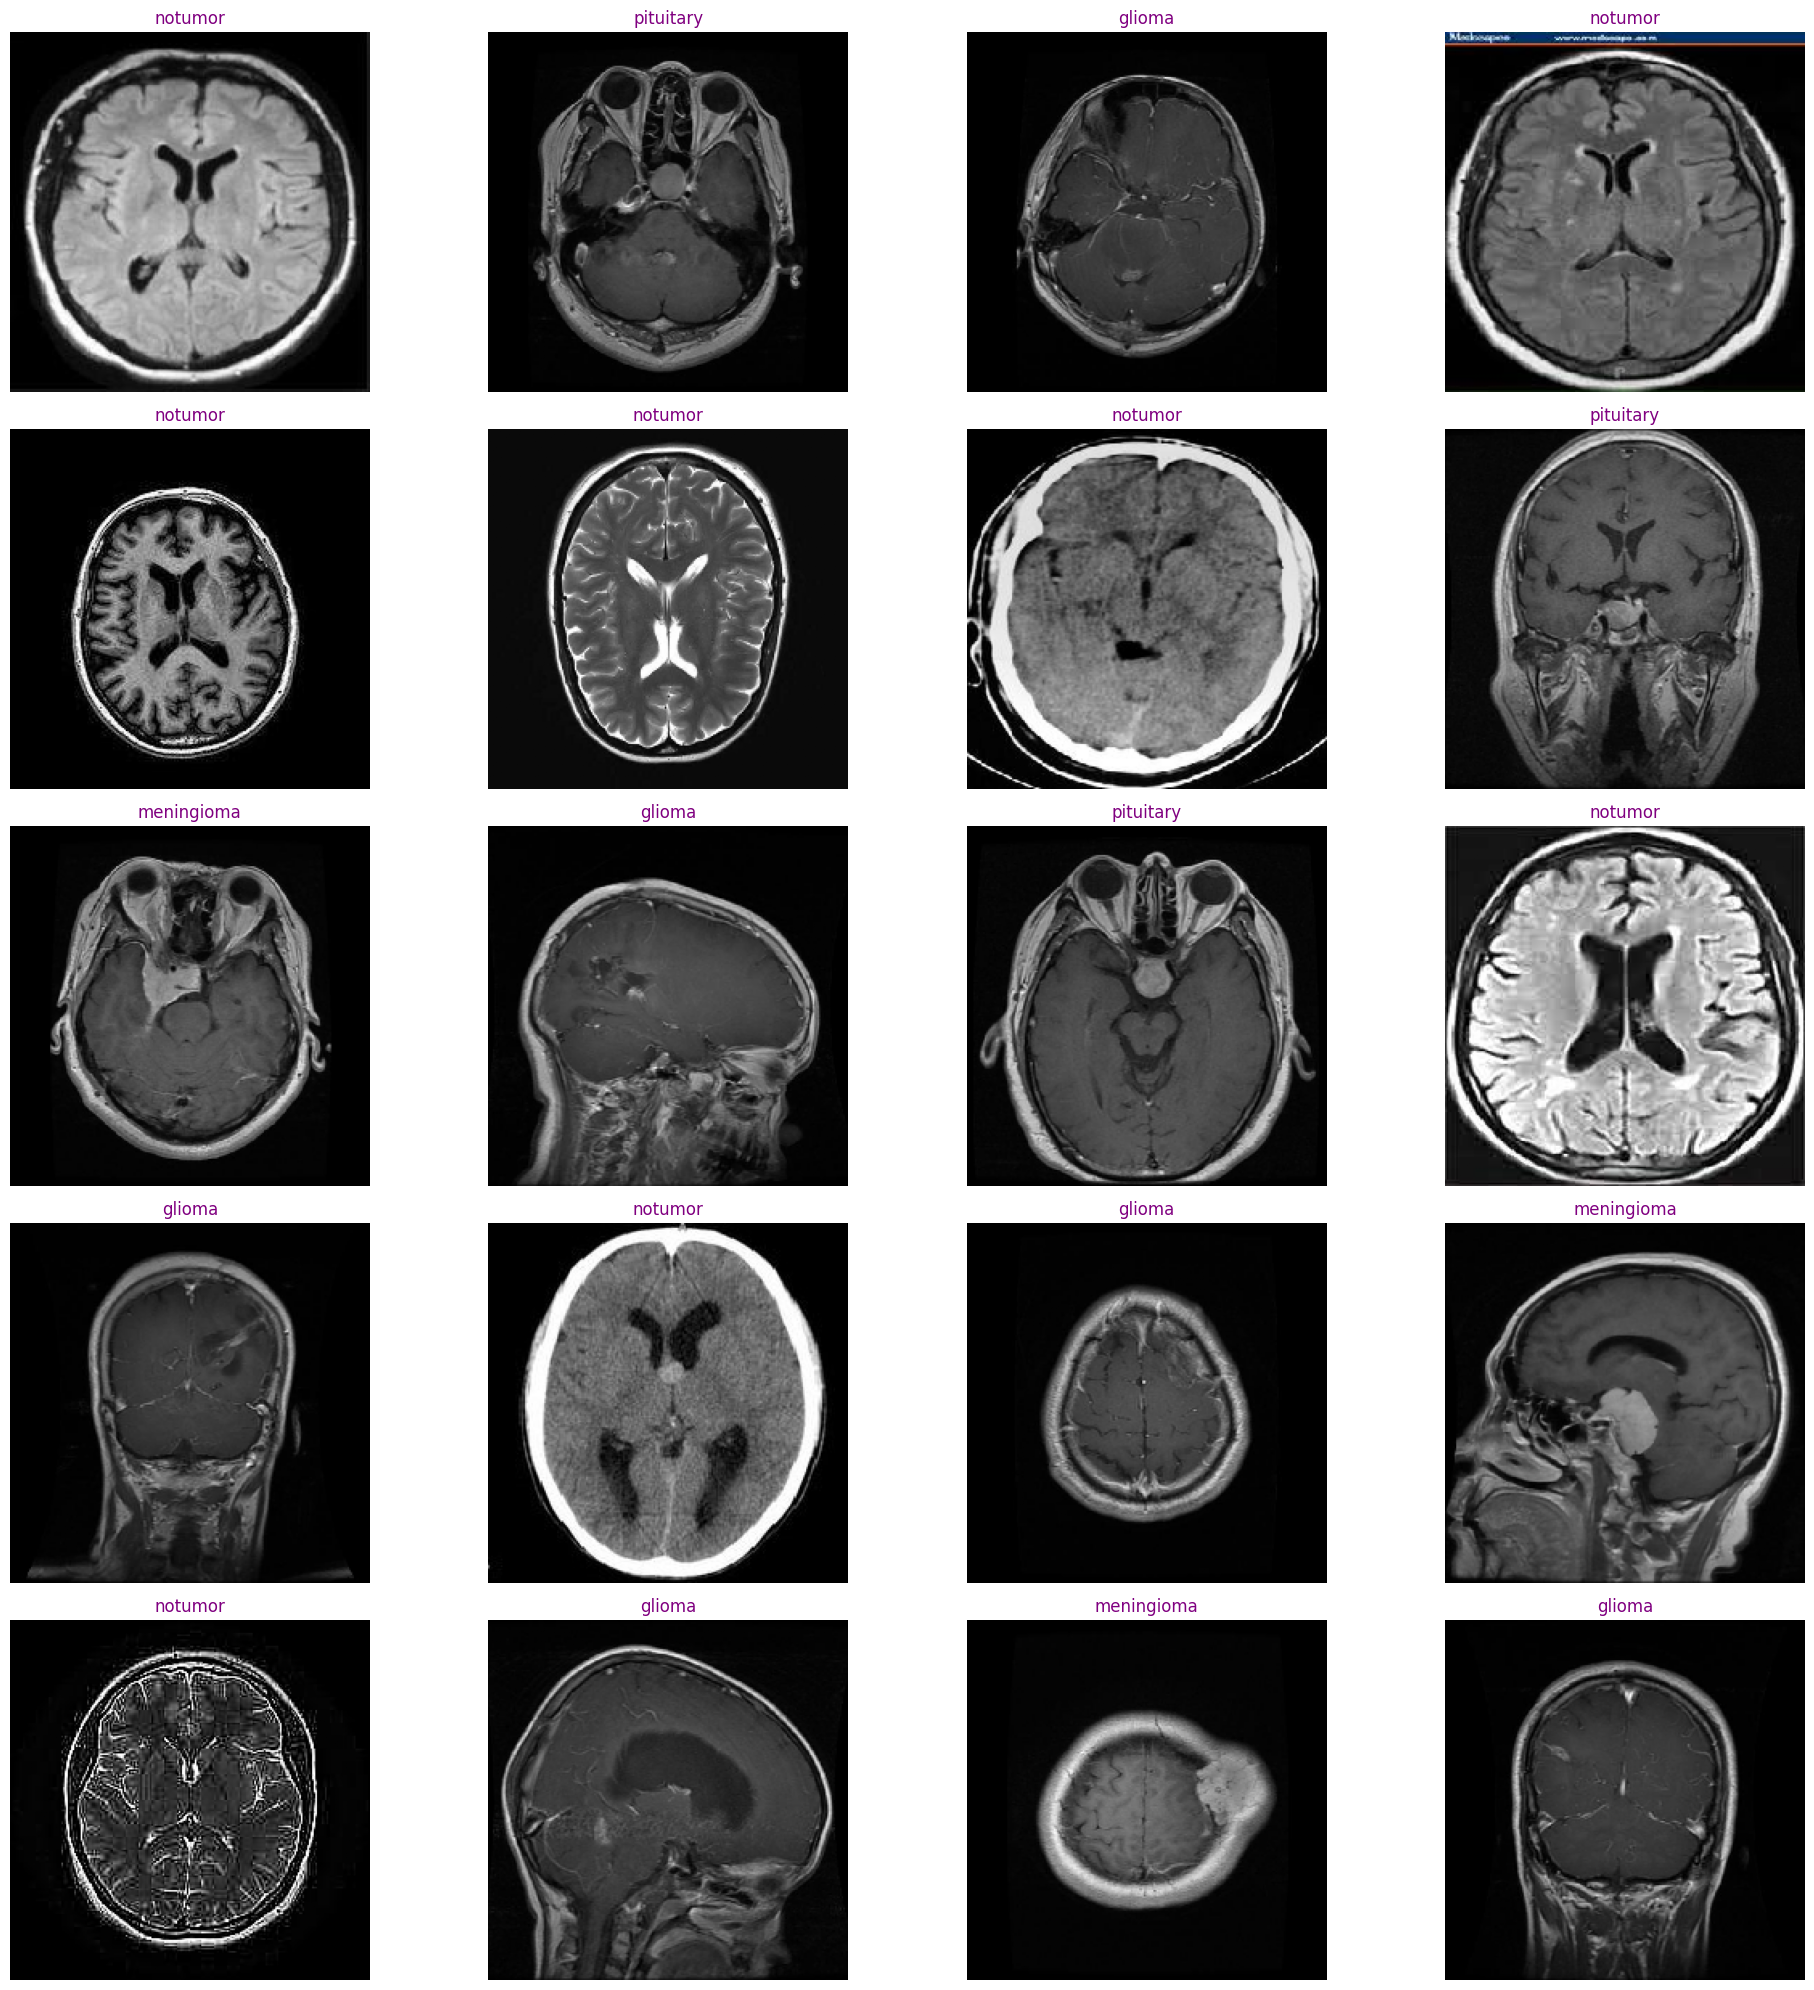

In [24]:
plt.figure(figsize= (20, 20))

for i in range(20):
    plt.subplot(5, 4, i +1)
    im = imgs[i]/255
    plt.imshow(im)

    #Labelling
    index = np.argmax(labels[i])
    label = Keys[index]
    plt.title(label, color = 'purple')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [25]:
# Define hyperparameters

batch_size = 20
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)


In [26]:
Train


In [27]:
# Define number of classes
counter_classes = len(list(Train.class_indices.keys()))
counter_classes

4

In [28]:
CNN = Sequential([
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'elu', input_shape = img_shape),
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    MaxPooling2D((2,2)),

    Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    MaxPooling2D((2,2)),

    Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    MaxPooling2D((2,2)),

    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    MaxPooling2D((2,2)),

    Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    MaxPooling2D((2,2)),

    Flatten(),

    Dense(256, activation = 'elu'),
    Dense(128, activation = 'elu'),
    Dense(64, activation = 'elu'),
    Dense(32, activation = 'elu'),
    Dense(counter_classes, activation = 'softmax')
])

In [29]:
# Model Compilation
CNN.compile(Adamax(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = 'accuracy')

In [30]:
# Get summary
CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 128)     3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 128)     147584    
                                                                 
 conv2d_2 (Conv2D)           (None, 224, 224, 128)     147584    
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 128)     0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 256)     295168    
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 256)     590080    
                                                        

In [31]:
Train

In [32]:
epochs = 15

history = CNN.fit(x = Train, epochs = epochs, verbose = 1, validation_data = Valid, shuffle = False)

Epoch 1/15
288/288 [==============================] - 1042s 4s/step - loss: 0.6692 - accuracy: 0.7583 - val_loss: 0.5461 - val_accuracy: 0.7664
Epoch 2/15
288/288 [==============================] - 188s 653ms/step - loss: 0.3301 - accuracy: 0.8797 - val_loss: 0.4457 - val_accuracy: 0.8183
Epoch 3/15
288/288 [==============================] - 188s 652ms/step - loss: 0.2542 - accuracy: 0.9086 - val_loss: 0.3853 - val_accuracy: 0.8611
Epoch 4/15
288/288 [==============================] - 188s 652ms/step - loss: 0.2087 - accuracy: 0.9246 - val_loss: 0.3029 - val_accuracy: 0.8779
Epoch 5/15
288/288 [==============================] - 188s 652ms/step - loss: 0.1623 - accuracy: 0.9429 - val_loss: 0.1997 - val_accuracy: 0.9252
Epoch 6/15
288/288 [==============================] - 191s 662ms/step - loss: 0.1230 - accuracy: 0.9556 - val_loss: 0.2954 - val_accuracy: 0.8885
Epoch 7/15
288/288 [==============================] - 188s 651ms/step - loss: 0.1030 - accuracy: 0.9641 - val_loss: 0.1803 - v

In [33]:
# accuracy and loss of Train

tr_acc = history.history['accuracy']
tr_loss = history.history['loss']


# accuracy and loss or Valid\

v_acc = history.history['val_accuracy']
v_loss = history.history['val_loss']


# highest value of v_acc by getting its index

index_acc = np.argmax(v_acc)
high_Vacc = v_acc[index_acc]


# lowest value of v_loss by getting index

index_loss = np.argmin(v_loss)
low_Vloss = v_loss[index_loss]


# n. of epochs based on length of tr_acc values

Epochs =[]
for i in range(len(tr_acc)):
    Epochs.append (i+1)


# Define best epoch

best_acc = f'Best epoch ={str(index_acc +1)}'
best_loss = f'Best epoch ={str(index_loss+1)}'

In [34]:
# check Epochs and tr_acc
print(Epochs)
print(tr_acc)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0.7582723498344421, 0.8796586394309998, 0.9085684418678284, 0.9245907068252563, 0.9428770542144775, 0.9555903673171997, 0.9641240239143372, 0.9642981290817261, 0.9787530303001404, 0.976314902305603, 0.9832810759544373, 0.9905956387519836, 0.993033766746521, 0.984674334526062, 0.9898989796638489]


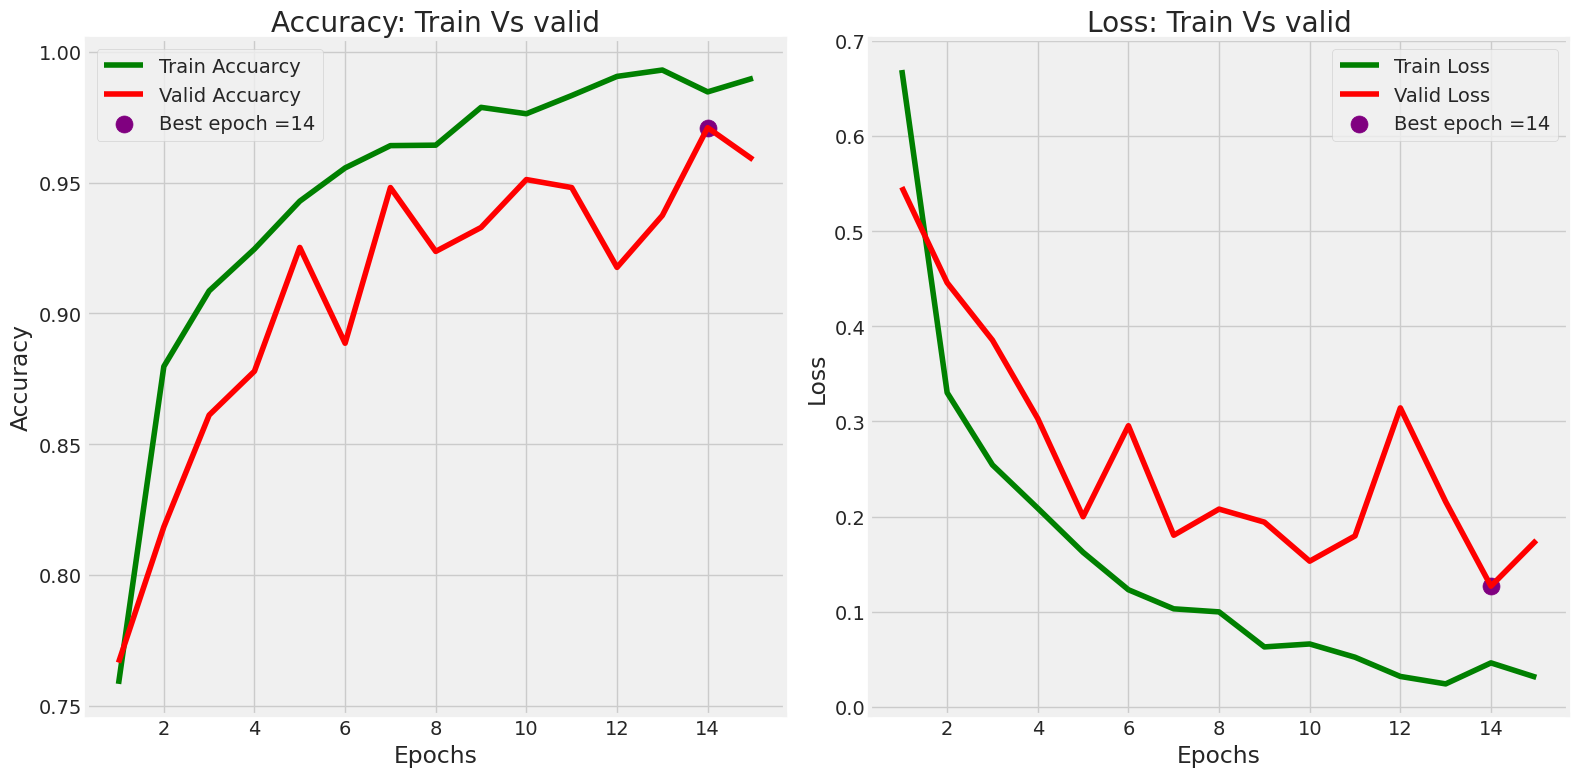

In [35]:
plt.figure(figsize = (16, 8))
plt.style.use('fivethirtyeight')


plt.subplot(1,2,1)
plt.plot(Epochs, tr_acc, "g", label = "Train Accuarcy")
plt.plot(Epochs, v_acc, "r", label = "Valid Accuarcy")
plt.scatter(index_acc+1, high_Vacc, s= 150, color = 'purple', label = best_acc)

plt.title("Accuracy: Train Vs valid")
plt. xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(Epochs, tr_loss, "g", label = "Train Loss")
plt.plot(Epochs, v_loss, "r", label = "Valid Loss")
plt.scatter(index_loss+1, low_Vloss, s= 150, color = 'purple', label = best_loss)

plt.title("Loss: Train Vs valid")
plt. xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [36]:
# Define Vars
Train_sc = CNN.evaluate(Train, verbose = 0)
Valid_sc = CNN.evaluate(Valid, verbose = 0)
Test_sc =CNN.evaluate(Test, verbose = 0)

#Print
print('Train Scores : \n    accuracy:', Train_sc[1], '\n      Loss: ', Train_sc[0], '\n________________________')
print('Valid Scores : \n    accuracy:', Valid_sc[1], '\n      Loss: ', Valid_sc[0], '\n________________________')
print('Test Scores : \n    accuracy:', Test_sc[1], '\n      Loss: ', Test_sc[0], '\n________________________')

Train Scores : 
    accuracy: 0.9942528605461121 
      Loss:  0.020679380744695663 
________________________
Valid Scores : 
    accuracy: 0.9587786197662354 
      Loss:  0.17491686344146729 
________________________
Test Scores : 
    accuracy: 0.9649389982223511 
      Loss:  0.11881154030561447 
________________________


In [37]:
predictions = CNN.predict_generator(Test)
y_pred = np.argmax(predictions, axis = 1)

#Chack
print(predictions)
print(y_pred)

[[8.2497031e-09 1.0000000e+00 9.6212336e-09 3.8820396e-09]
 [9.9997675e-01 1.8571276e-05 2.4572494e-06 2.2206980e-06]
 [4.0423009e-05 2.0283018e-03 7.4286923e-05 9.9785691e-01]
 ...
 [5.3959729e-06 9.0641443e-05 5.1470479e-04 9.9938929e-01]
 [1.4748779e-10 9.2918441e-08 9.9999988e-01 3.2732514e-14]
 [9.9999750e-01 2.4151600e-06 1.1518359e-07 3.3333494e-10]]
[1 0 3 2 1 1 0 3 1 3 3 1 0 0 0 0 1 3 3 1 3 3 2 2 3 2 2 0 2 2 2 2 2 1 0 2 3
 0 3 2 2 1 1 3 0 0 0 1 1 3 2 1 1 0 2 0 2 3 2 1 1 3 1 1 1 3 0 1 3 1 2 3 2 3
 3 2 2 1 3 0 0 2 1 1 0 2 0 2 0 2 3 2 0 2 0 0 0 0 1 1 2 1 1 3 0 1 2 0 1 2 2
 0 3 2 2 3 2 0 3 0 3 1 0 1 2 2 3 2 2 1 2 0 2 1 0 2 3 0 0 3 1 2 2 0 2 3 0 3
 1 0 2 2 1 2 2 2 1 1 2 2 3 2 1 2 0 0 3 1 2 2 2 2 3 2 2 2 2 0 3 3 3 2 2 2 1
 3 2 2 1 2 3 2 0 3 1 1 2 2 2 0 2 2 3 2 3 2 2 2 2 2 3 0 2 1 1 2 1 2 2 0 2 0
 1 2 3 1 2 3 2 3 3 1 3 1 3 1 1 2 1 1 3 1 1 2 2 0 1 0 1 1 3 2 0 0 0 0 3 2 2
 2 1 2 1 0 0 3 0 1 3 3 2 2 1 2 3 2 1 1 3 3 0 0 0 1 0 3 3 2 3 3 2 2 3 0 2 2
 3 1 0 3 3 2 0 2 3 2 2 3 1 3 3 1 0 0 1 1

In [38]:
# Use n. of keys of  Class indices to greate confusion matrix
Test_cl_ind = Test.class_indices

# Get Keys
classes = list(Test_cl_ind.keys())

#CM
cm = confusion_matrix(Test.classes, y_pred)
cm

array([[125,  13,   0,   1],
       [  2, 139,   4,   1],
       [  0,   1, 221,   0],
       [  0,   1,   0, 148]])

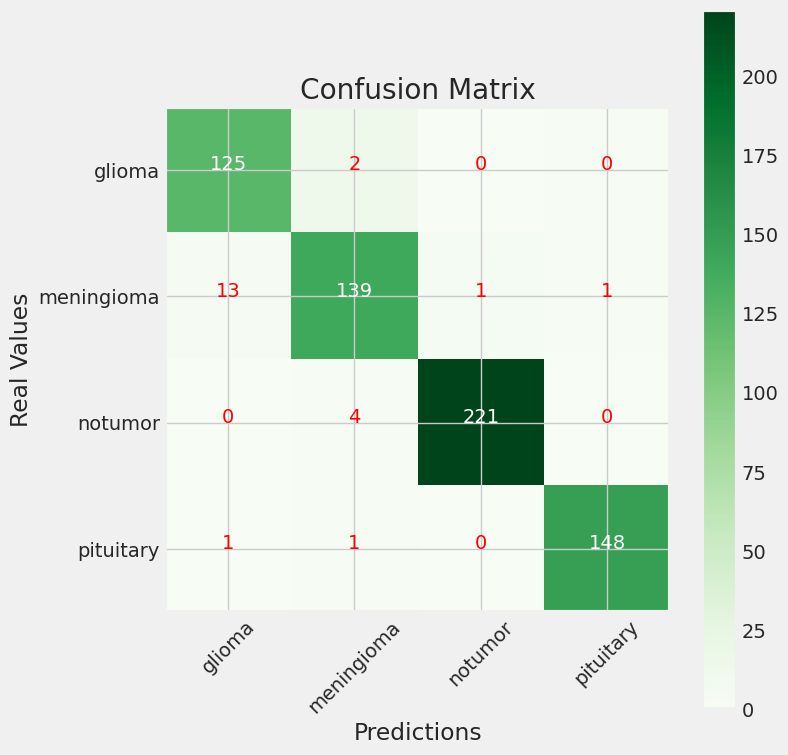

In [39]:
#visualise it
plt.figure(figsize =(8, 8))
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes,rotation = 45)
plt.yticks(tick_marks, classes)

thresh = cm.max()/2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(i, j, cm[i, j], horizontalalignment = 'center', color = 'white' if cm[i,j] > thresh  else 'red')

plt.tight_layout()
plt.xlabel('Predictions')
plt.ylabel('Real Values')
plt.show()

In [41]:
CNN.save('braintumor.h5')